In [1]:
from langgraph.graph import StateGraph, START, END, MessagesState

In [2]:
from langchain.chat_models import init_chat_model

In [3]:
model_id="gemini-2.5-flash-preview-05-20"
llm = init_chat_model(model=model_id,  model_provider="google_vertexai")

In [4]:
from langchain_core.runnables import RunnableConfig
config = RunnableConfig()
def call_model(state: MessagesState) -> MessagesState:
    state['messages'] = llm.invoke(input = state['messages'],config=config)
    return state

In [34]:
graph_builder = StateGraph(MessagesState)
graph_builder.add_node("llm", call_model)
graph_builder.add_edge(START, "llm")
graph_builder.add_edge("llm", END)
graph = graph_builder.compile()

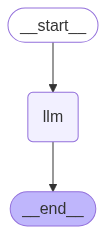

In [6]:
from utils import draw_graph
draw_graph(graph)

In [7]:
from langchain_core.messages import SystemMessage, HumanMessage

messages = [
    SystemMessage("You are an helpful assistant"),
    HumanMessage("I would like to know about democracy")

]
result = graph.invoke({"messages": messages})

In [8]:
result['messages']

[SystemMessage(content='You are an helpful assistant', additional_kwargs={}, response_metadata={}, id='3e9b43fd-e711-4331-916c-7ddab1ad364d'),
 HumanMessage(content='I would like to know about democracy', additional_kwargs={}, response_metadata={}, id='f7c8ec03-51e5-4056-af93-4bbe81a72463'),
 AIMessage(content='Democracy is a system of government where the **supreme power is vested in the people** and exercised by them directly or indirectly through a system of representation, usually involving periodically held free and fair elections.\n\nThe word "democracy" comes from the Greek words *demos* (people) and *kratos* (power or rule), meaning "rule by the people."\n\nHere\'s a breakdown of its key aspects:\n\n---\n\n### Core Principles and Characteristics:\n\n1.  **Sovereignty of the People:** The ultimate power resides with the citizens, not with a monarch, dictator, or elite group.\n2.  **Free and Fair Elections:** Citizens have the right to choose their representatives through regular

In [9]:
for message in result['messages']:
    message.pretty_print()

================================ System Message ================================

You are an helpful assistant
================================ Human Message =================================

I would like to know about democracy
================================== Ai Message ==================================

Democracy is a system of government where the **supreme power is vested in the people** and exercised by them directly or indirectly through a system of representation, usually involving periodically held free and fair elections.

The word "democracy" comes from the Greek words *demos* (people) and *kratos* (power or rule), meaning "rule by the people."

Here's a breakdown of its key aspects:

---

### Core Principles and Characteristics:

1.  **Sovereignty of the People:** The ultimate power resides with the citizens, not with a monarch, dictator, or elite group.
2.  **Free and Fair Elections:** Citizens have the right to choose their representatives through regular, competitive

In [10]:
from IPython.display import Markdown
Markdown(result['messages'][-1].content)

Democracy is a system of government where the **supreme power is vested in the people** and exercised by them directly or indirectly through a system of representation, usually involving periodically held free and fair elections.

The word "democracy" comes from the Greek words *demos* (people) and *kratos* (power or rule), meaning "rule by the people."

Here's a breakdown of its key aspects:

---

### Core Principles and Characteristics:

1.  **Sovereignty of the People:** The ultimate power resides with the citizens, not with a monarch, dictator, or elite group.
2.  **Free and Fair Elections:** Citizens have the right to choose their representatives through regular, competitive elections where votes are counted accurately and all eligible citizens have the right to vote and run for office.
3.  **Protection of Human Rights and Civil Liberties:** Democracies uphold fundamental rights such as freedom of speech, assembly, religion, press, and the right to a fair trial. These rights ensure citizens can participate meaningfully and hold their government accountable.
4.  **Rule of Law:** Everyone, including government officials, is subject to the law, which is applied equally and justly. Laws are transparent, publicly promulgated, and enforced independently.
5.  **Separation of Powers:** To prevent the concentration of power, governmental authority is typically divided among different branches (e.g., legislative, executive, judicial), each with distinct responsibilities and checks and balances on the others.
6.  **Pluralism and Tolerance:** Democracies embrace the existence of diverse political parties, opinions, and social groups. Open debate and the acceptance of differing viewpoints are crucial.
7.  **Citizen Participation:** Beyond just voting, citizens are encouraged to participate in public life, express their views, and engage in civic activities.

---

### Types of Democracy:

1.  **Direct Democracy:** Citizens directly participate in decision-making by voting on laws and policies themselves.
    *   **Examples:** Ancient Athens (limited by its time), modern referendums and initiatives in some countries (e.g., Switzerland).
    *   **Pros:** High citizen involvement, direct expression of will.
    *   **Cons:** Impractical for large populations, can lead to "tyranny of the majority."

2.  **Representative Democracy (Republic):** Citizens elect representatives to make decisions on their behalf. This is the most common form of democracy today.
    *   **Examples:** Most modern nations.
    *   **Pros:** Practical for large populations, allows for informed decision-making by elected experts, protects minority rights through constitutionalism.
    *   **Cons:** Can lead to voter apathy, representatives may not always perfectly reflect constituent views.

    Within representative democracies, there are further distinctions:
    *   **Parliamentary Democracy:** The executive branch (Prime Minister and cabinet) is drawn from and accountable to the legislative branch (parliament). (e.g., United Kingdom, Canada, India).
    *   **Presidential Democracy:** The executive branch (President) is separate from and independent of the legislative branch. (e.g., United States, Brazil).
    *   **Semi-Presidential System:** A mix of both, with an elected president and a prime minister responsible to the legislature. (e.g., France, Russia).

3.  **Constitutional Democracy:** While not a separate type of government, it's a crucial characteristic of modern democracies. It emphasizes that the government's power is limited by a constitution, which outlines the rights of citizens and the boundaries of state authority. This prevents the "tyranny of the majority" by protecting fundamental liberties even if a majority wishes to infringe upon them.

---

### Advantages of Democracy:

*   **Legitimacy and Stability:** Governments derive their authority from the consent of the governed, leading to greater public acceptance and less likelihood of violent overthrow.
*   **Accountability:** Leaders are accountable to the people and can be removed through elections.
*   **Protection of Rights:** Designed to safeguard individual liberties and minority rights.
*   **Adaptability:** Allows for peaceful changes in leadership and policies in response to public will.
*   **Promotes Participation:** Encourages citizens to engage in public life and express their views.
*   **Better Decision-Making (ideally):** Diverse viewpoints and open debate can lead to more comprehensive and effective policies.
*   **Reduced Conflict:** Provides peaceful mechanisms for resolving political disagreements.

---

### Challenges and Criticisms of Democracy:

*   **Inefficiency and Slow Decision-Making:** Debates, checks and balances, and the need for consensus can make the democratic process slow and cumbersome.
*   **Voter Apathy:** Low voter turnout and disengagement can undermine the legitimacy of elected officials.
*   **Tyranny of the Majority:** The concern that the majority's will could suppress the rights or interests of minority groups.
*   **Populism and Demagoguery:** The risk that leaders can exploit public emotions and prejudices for political gain, bypassing rational deliberation.
*   **Influence of Money:** Wealthy individuals and corporations can exert undue influence over elections and policy-making.
*   **Polarization:** Deep divisions within society can lead to gridlock and an inability to compromise.
*   **Misinformation and Disinformation:** The spread of false or misleading information, especially through social media, can distort public discourse and undermine informed decision-making.

---

### Conclusion:

Democracy is a dynamic and evolving system. While it has inherent challenges and is not without its flaws, it remains widely regarded as the most just and legitimate form of governance because it places power in the hands of the people and seeks to protect individual freedoms and human dignity. The health of a democracy depends on active, informed citizens, robust institutions, and a commitment to its core principles.

In [11]:
from langchain_core.messages import SystemMessage, HumanMessage
messages = [
    SystemMessage("You are an helpful assistant"),
    HumanMessage("I would like to know about democracy")

]



In [12]:
# synchronous
for chunk in graph.stream({"messages": messages}, stream_mode="updates"):
    print(chunk)

{'llm': {'messages': AIMessage(content='Democracy, at its heart, means "rule by the people." The word itself comes from the Greek *demos* (people) and *kratos* (power or rule).\n\nIt\'s a system of government where the citizens exercise power either directly or by electing representatives from among themselves to form a governing body, such as a parliament or congress.\n\nHere\'s a breakdown of its key aspects:\n\n### Core Principles of Democracy\n\n1.  **Popular Sovereignty:** The ultimate authority rests with the people. Government derives its legitimacy from the consent of the governed.\n2.  **Equality:** All citizens are equal before the law and have equal political rights, regardless of race, gender, religion, or socio-economic status.\n3.  **Liberty/Freedom:** Guarantees fundamental individual freedoms such as freedom of speech, assembly, press, religion, and the right to privacy.\n4.  **Rule of Law:** Everyone, including those in power, is subject to and accountable under the la

In [13]:
# async
async for chunk in graph.astream({"messages": messages}, stream_mode="updates"):
    print(chunk)

{'llm': {'messages': AIMessage(content='Democracy is a system of government where the **power is vested in the people**, who then exercise it either directly or through elected representatives. The word "democracy" comes from the Greek words "demos" (people) and "kratos" (power or rule), meaning "rule by the people."\n\nHere\'s a breakdown of its key aspects:\n\n### 1. Core Principles (The Pillars of Democracy)\n\n*   **Rule by the People (Popular Sovereignty):** The ultimate authority and legitimacy of the government come from the consent of its citizens.\n*   **Free and Fair Elections:** Citizens have the right to choose their representatives through regular, competitive elections where votes are counted accurately and all eligible voters can participate without undue influence or intimidation.\n*   **Protection of Human Rights:** Fundamental rights and freedoms (like freedom of speech, assembly, religion, press, and the right to due process) are legally enshrined and protected for a

In [14]:
# synchronous
llm.invoke(messages)

AIMessage(content='Democracy is a system of government where **power is vested in the people**, who then exercise it either directly or through elected representatives. The word itself comes from the Greek *demos* (people) and *kratos* (rule), meaning "rule by the people."\n\nHere\'s a breakdown of its key aspects:\n\n---\n\n### **Core Principles & Pillars of Democracy**\n\n1.  **Popular Sovereignty:** The ultimate source of authority is the will of the people. Government legitimacy derives from the consent of the governed.\n2.  **Equality:** All citizens are equal before the law and have equal political rights (e.g., one person, one vote).\n3.  **Liberty/Rights:** Protection of fundamental human rights and civil liberties, such as freedom of speech, assembly, press, religion, and the right to due process. These are crucial for citizens to participate effectively.\n4.  **Rule of Law:** Everyone, including those in power, is subject to the law, which is applied equally and fairly. No on

In [15]:
# async
async for chunk in llm.astream(messages):
    if chunk.content:
        print(chunk.content)

Democracy, at its core, is a system of government where the ultimate power is vested in the people, who then exercise it either directly or through elected representatives. The word itself comes from the Greek "demos" (people) and "kratos" (power or rule).

Here's a breakdown
 of its key aspects:

---

### **Core Principles of Democracy**

1.  **Sovereignty of the People:** The belief that the authority of the state is created and sustained by the consent of its people, through their elected representatives, who are the source of all political power.
2.  **Rule of Law:**
 Everyone, including those in power, is subject to the law. Laws are transparent, applied equally, and fairly enforced. No one is above the law.
3.  **Equality:** All citizens are equal before the law and have equal political rights, such as the right to vote.
4.  **Individual
 Rights and Freedoms:** Protection of fundamental human rights, such as freedom of speech, assembly, religion, and the press. These are essentia

In [18]:
from typing import TypedDict
class MyState(TypedDict):
    message: str

In [20]:
from time import sleep
def node_1(state: MyState) -> MyState:
    state['message'] = "Im in node 1"
    sleep(2)
    return state

def node_2(state: MyState) -> MyState:
    state['message'] = "Im in node 2"
    sleep(2)
    return state

def node_3(state: MyState) -> MyState:
    state['message'] = "Im in node 3"
    sleep(2)
    return state

def node_4(state: MyState) -> MyState:
    state['message'] = "Im in node 4"
    sleep(2)
    return state

def node_5(state: MyState) -> MyState:
    state['message'] = "Im in node 5"
    sleep(2)
    return state

In [23]:
my_graph_builder = StateGraph(MyState)
my_graph_builder.add_node("node1", node_1)
my_graph_builder.add_node("node2", node_2)
my_graph_builder.add_node("node3", node_3)
my_graph_builder.add_node("node4", node_4)
my_graph_builder.add_node("node5", node_5)
my_graph_builder.set_entry_point("node1")
my_graph_builder.set_finish_point("node5")
my_graph_builder.add_edge("node1", "node2")
my_graph_builder.add_edge("node2", "node3")
my_graph_builder.add_edge("node3", "node4")
my_graph_builder.add_edge("node4", "node5")
my_graph = my_graph_builder.compile()

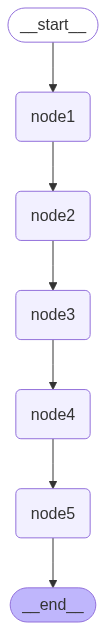

In [24]:
from utils import draw_graph
draw_graph(my_graph)

In [29]:
for chunk in my_graph.stream({"message": ""}, stream_mode="updates"):
    print(chunk)

{'node1': {'message': 'Im in node 1'}}
{'node2': {'message': 'Im in node 2'}}
{'node3': {'message': 'Im in node 3'}}
{'node4': {'message': 'Im in node 4'}}
{'node5': {'message': 'Im in node 5'}}


In [28]:
for chunk in my_graph.stream({"message": ""}, stream_mode="debug"):
    print(chunk)

{'type': 'task', 'timestamp': '2025-06-13T04:51:40.806682+00:00', 'step': 1, 'payload': {'id': '8e251852-6168-729d-c06a-5befb14c4fc5', 'name': 'node1', 'input': {'message': ''}, 'triggers': ('branch:to:node1',)}}
{'type': 'task_result', 'timestamp': '2025-06-13T04:51:42.810797+00:00', 'step': 1, 'payload': {'id': '8e251852-6168-729d-c06a-5befb14c4fc5', 'name': 'node1', 'error': None, 'result': [('message', 'Im in node 1')], 'interrupts': []}}
{'type': 'task', 'timestamp': '2025-06-13T04:51:42.810797+00:00', 'step': 2, 'payload': {'id': 'a2e26406-ead0-080b-9dac-fe7063b0e8f7', 'name': 'node2', 'input': {'message': 'Im in node 1'}, 'triggers': ('branch:to:node2',)}}
{'type': 'task_result', 'timestamp': '2025-06-13T04:51:44.814856+00:00', 'step': 2, 'payload': {'id': 'a2e26406-ead0-080b-9dac-fe7063b0e8f7', 'name': 'node2', 'error': None, 'result': [('message', 'Im in node 2')], 'interrupts': []}}
{'type': 'task', 'timestamp': '2025-06-13T04:51:44.814856+00:00', 'step': 3, 'payload': {'id':